# EDA & Data Preprocessing

This notebook is used to perform EDA and prepare the data for modelling

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 41188 rows and 21 columns


## EDA (Exploratory Data Analysis)

1. Check data types because there are some numerical and some categorical features

In [19]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

1a. Categorical Variables

In [20]:
print(f"Based on the data, these are the categorical columns: {list(df.columns[df.dtypes=='object'])}")

Based on the data, these are the categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


For each of the categorical columns, check their unique values

In [21]:
for cat_col in list(df.columns[df.dtypes=='object']):
    print(f"Column: {cat_col}")
    print(df[cat_col].unique())
    print(df[cat_col].value_counts())

Column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Column: marital
['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education

*Note: We will need to do one-hot-encoding to these categorical features*  

*Note: There are some 'unknown' values that we will need to consider removing*

1b. Numerical Variables

In [22]:
print(f"Based on the data, these are the numerical columns: {list(df.columns[df.dtypes!='object'])}")

Based on the data, these are the numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


For each of the numerical variables, visualize their distribution using a boxplot

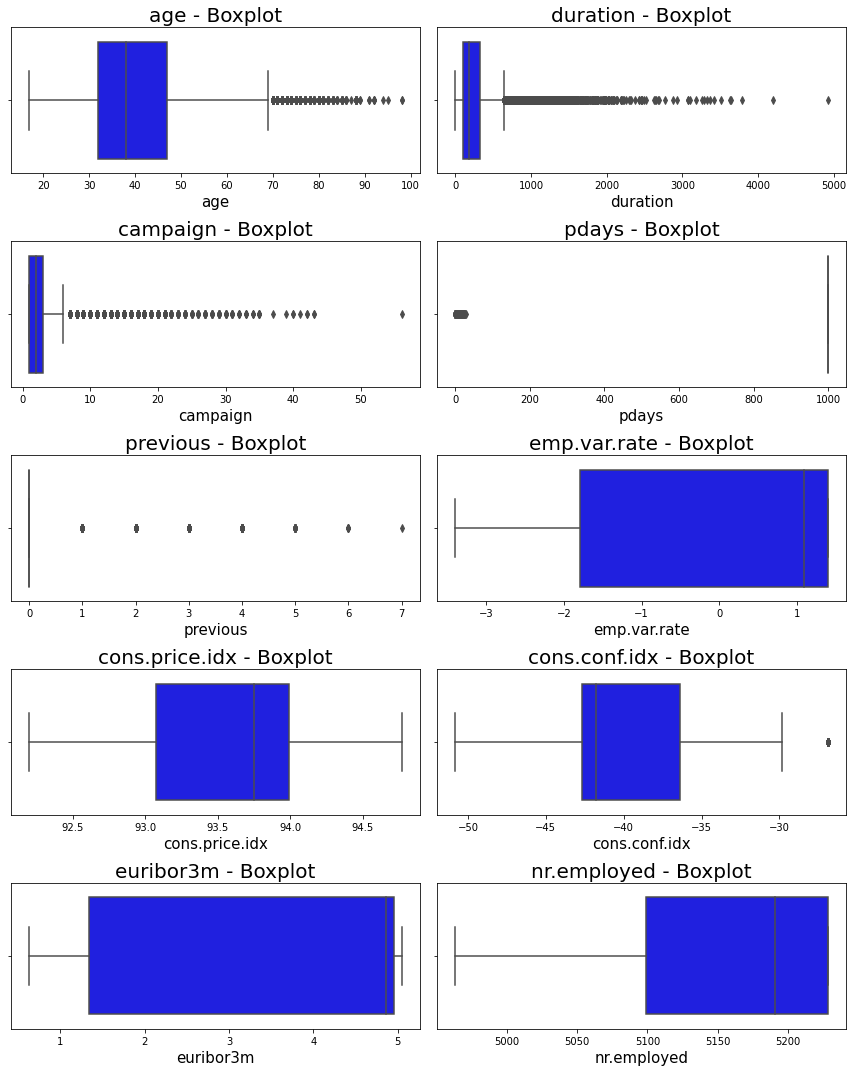

In [23]:
df_num_variables = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
numerical_columns = list(df.columns[df.dtypes!='object'])
plt.figure(figsize=(12,15))

for k,val in enumerate(numerical_columns):
    plt.subplot(5,2,k+1)
    sns.boxplot(x = val, data = df_num_variables, color='blue')
    plt.title(f"{val} - Boxplot", size=20, color="black")
    plt.xlabel(f"{val}", size=15)
plt.tight_layout()
plt.show()

*Note: There are some outliers based on the numerical data, we may need to remove them or find some form of treatment*

---

1c. Check data for nulls

In [24]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There does not seem to be any null values in the data, no treatment of null values is required. However, based on the previous finding in categorical variables, there are "unknown" values that we need to remove.

2. Check value count of target variable

In [25]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Data Preprocessing

1. Remove "unknown" values

In [26]:
for col in df.columns:
    # Replace unknown with nan and drop them
    df[col].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [27]:
print(f"After removing rows with 'unknown', the dataframe now has {df.shape[0]} rows and {df.shape[1]} columns")

After removing rows with 'unknown', the dataframe now has 30488 rows and 21 columns


In [28]:
df["y"].value_counts()

no     26629
yes     3859
Name: y, dtype: int64

The ratio of "yes" to "no" is still skewed, we will try to downsample it to make it less skewed

Downsample majority class to make the distribution of target less skewed

In [29]:
from sklearn.utils import resample
df_majority = df[df["y"]=="no"]
df_minority = df[df["y"]=="yes"]

In [30]:
# Downsample majority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False,    
    n_samples=12000
)

# Combine minority class with downsampled majority class
df_down_sampled = pd.concat([df_majority_downsampled, df_minority])

In [31]:
df_down_sampled["y"].value_counts()

no     12000
yes     3859
Name: y, dtype: int64

In [32]:
df = df_down_sampled

2. Perform one-hot encoding on categorical features

2a. Replace binary categorical features

In [34]:
# For columns with yes, no values only
mapping = {"yes": 1, "no": 0}
columns_with_yes_no = ['default', 'housing', 'loan', 'y']

for col in columns_with_yes_no:
    df[col] = df[col].map(mapping)

2b. Replace ordinal features

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
remaining_cat_columns = ["month", "day_of_week"]

for col in remaining_cat_columns:  
    df[col] = le.fit_transform(df[col])

2c. Replace all other categorical features

In [36]:
df = pd.get_dummies(df, columns = ['job','marital','education', 'contact', 'poutcome'])

In [37]:
print(f"After OHE, the dataframe now has {df.shape[0]} rows and {df.shape[1]} columns")

After OHE, the dataframe now has 15859 rows and 42 columns


Save out the dataset as "bank-additional-clean.csv" for easy usage by all models

In [39]:
df.to_csv("bank-additional-clean.csv", index=None)